# Exploratory Data Analysis: Flight Delays (JFK)
In this notebook, we load the raw data from Airline_Delay_Cause.csv and perform initial data cleaning, filtering, and exploratory visualizations with an emphasis on JFK airport.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
# load raw data
df = pd.read_csv("../data/raw/raw data/Jan-Dec2024_BTS/Airline_Delay_Cause.csv")
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,12,MQ,Envoy Air,EVV,"Evansville, IN: Evansville Regional",61.0,9.0,1.52,1.08,...,0.0,5.84,0.0,0.0,732.0,47.0,90.0,19.0,0.0,576.0
1,2024,12,MQ,Envoy Air,EWR,"Newark, NJ: Newark Liberty International",107.0,42.0,6.01,5.89,...,0.0,4.94,0.0,0.0,2531.0,335.0,491.0,1251.0,0.0,454.0
2,2024,12,MQ,Envoy Air,EYW,"Key West, FL: Key West International",169.0,31.0,3.37,0.71,...,0.0,15.48,5.0,3.0,1596.0,143.0,52.0,468.0,0.0,933.0
3,2024,12,MQ,Envoy Air,FAR,"Fargo, ND: Hector International",171.0,35.0,4.64,2.12,...,0.0,12.92,2.0,0.0,2428.0,245.0,184.0,575.0,0.0,1424.0
4,2024,12,MQ,Envoy Air,FSD,"Sioux Falls, SD: Joe Foss Field",69.0,14.0,2.00,2.47,...,0.0,4.83,1.0,0.0,720.0,86.0,154.0,191.0,0.0,289.0


In [11]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22609 entries, 0 to 22608
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 22609 non-null  int64  
 1   month                22609 non-null  int64  
 2   carrier              22609 non-null  object 
 3   carrier_name         22609 non-null  object 
 4   airport              22609 non-null  object 
 5   airport_name         22609 non-null  object 
 6   arr_flights          22593 non-null  float64
 7   arr_del15            22587 non-null  float64
 8   carrier_ct           22593 non-null  float64
 9   weather_ct           22593 non-null  float64
 10  nas_ct               22593 non-null  float64
 11  security_ct          22593 non-null  float64
 12  late_aircraft_ct     22593 non-null  float64
 13  arr_cancelled        22593 non-null  float64
 14  arr_diverted         22593 non-null  float64
 15  arr_delay            22593 non-null 

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [18]:
# filter to JFK airport
pd.set_option('display.max_rows', None)
df["airport"] = df["airport"].str.strip()
jfk_df = df[df["airport"] == "JFK"].reset_index(drop=True)

# save the filtered data to a clean directory
jfk_df.to_csv("../data/clean/JFK_Weather_Delay_Data.csv", index=False)

jfk_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,12,OO,SkyWest Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",201.0,47.0,28.09,6.83,...,0.00,0.00,2.0,0.0,5089.0,3307.0,634.0,1148.0,0.0,0.0
1,2024,12,9E,Endeavor Air Inc.,JFK,"New York, NY: John F. Kennedy International",1004.0,232.0,56.29,10.58,...,0.00,72.95,4.0,0.0,20067.0,4901.0,1333.0,6394.0,0.0,7439.0
2,2024,12,AA,American Airlines Network,JFK,"New York, NY: John F. Kennedy International",1155.0,258.0,70.50,5.37,...,1.24,86.36,2.0,2.0,22404.0,6889.0,374.0,5933.0,37.0,9171.0
3,2024,12,AS,Alaska Airlines Network,JFK,"New York, NY: John F. Kennedy International",356.0,105.0,18.70,5.69,...,0.00,25.54,1.0,0.0,5740.0,1437.0,376.0,2304.0,0.0,1623.0
4,2024,12,B6,JetBlue Airways,JFK,"New York, NY: John F. Kennedy International",3142.0,887.0,289.74,3.37,...,0.03,348.72,33.0,5.0,70865.0,22955.0,442.0,12582.0,3.0,34883.0
5,2024,12,DL,Delta Air Lines Network,JFK,"New York, NY: John F. Kennedy International",2575.0,576.0,201.10,8.55,...,1.64,146.13,1.0,2.0,42690.0,18362.0,2435.0,9981.0,178.0,11734.0
6,2024,12,F9,Frontier Airlines,JFK,"New York, NY: John F. Kennedy International",186.0,51.0,19.24,1.26,...,0.00,9.11,0.0,0.0,2176.0,1046.0,89.0,625.0,0.0,416.0
7,2024,12,HA,Hawaiian Airlines Network,JFK,"New York, NY: John F. Kennedy International",31.0,18.0,17.19,0.00,...,0.00,0.81,0.0,0.0,691.0,656.0,0.0,0.0,0.0,35.0
8,2024,12,YX,Republic Airline,JFK,"New York, NY: John F. Kennedy International",1621.0,357.0,86.05,13.87,...,1.00,78.19,9.0,1.0,22733.0,5734.0,907.0,10517.0,19.0,5556.0
9,2024,11,9E,Endeavor Air Inc.,JFK,"New York, NY: John F. Kennedy International",1213.0,91.0,20.60,5.82,...,0.00,23.51,0.0,1.0,4999.0,1265.0,357.0,2032.0,0.0,1345.0


    year  month  weather_delay       date
0   2024      1        13586.0 2024-01-01
1   2024      2         4533.0 2024-02-01
2   2024      3         6628.0 2024-03-01
3   2024      4         6504.0 2024-04-01
4   2024      5         8615.0 2024-05-01
5   2024      6        13445.0 2024-06-01
6   2024      7         9458.0 2024-07-01
7   2024      8        18668.0 2024-08-01
8   2024      9         3191.0 2024-09-01
9   2024     10         1531.0 2024-10-01
10  2024     11         1758.0 2024-11-01
11  2024     12         6590.0 2024-12-01


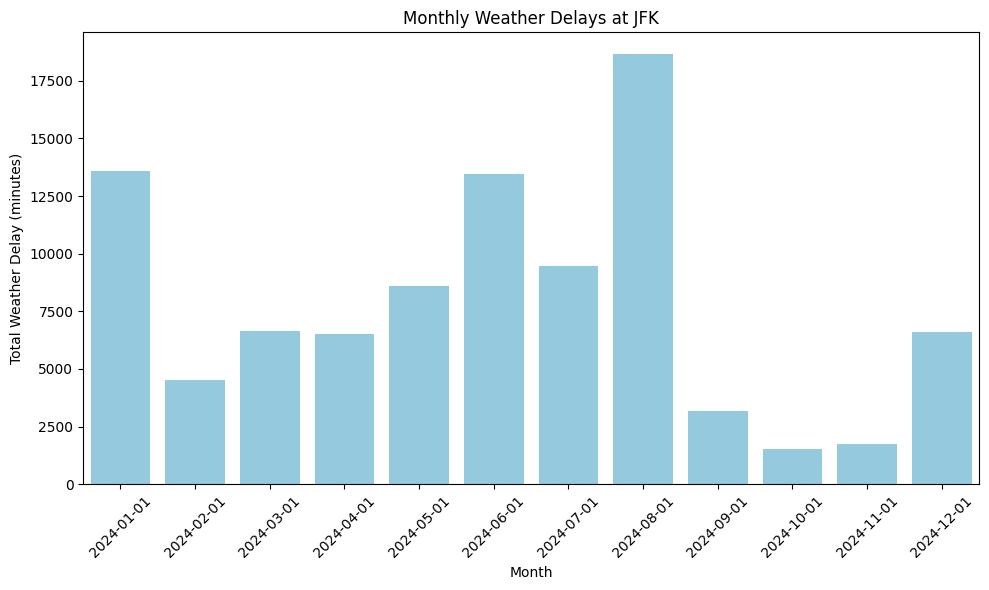

In [ ]:
# histogram of monthly delays caused by weather
# group by year and month, summing weather_delay
monthly_weather = jfk_df.groupby(["year", "month"])["weather_delay"].sum().reset_index()

# create date column for x-axis
monthly_weather["date"] = pd.to_datetime(monthly_weather[["year", "month"]].assign(day=1))
print(monthly_weather)

# plot histogram
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_weather, x="date", y="weather_delay", color="skyblue")
plt.title("Monthly Weather Delays at JFK")
plt.xlabel("Month")
plt.ylabel("Total Weather Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Jan: 32.81°F
Feb: 34.64°F
Mar: 41.26°F
Apr: 50.93°F
May: 60.48°F
Jun: 70.27°F
Jul: 76.33°F
Aug: 75.00°F
Sep: 68.43°F
Oct: 57.10°F
Nov: 46.90°F
Dec: 38.17°F


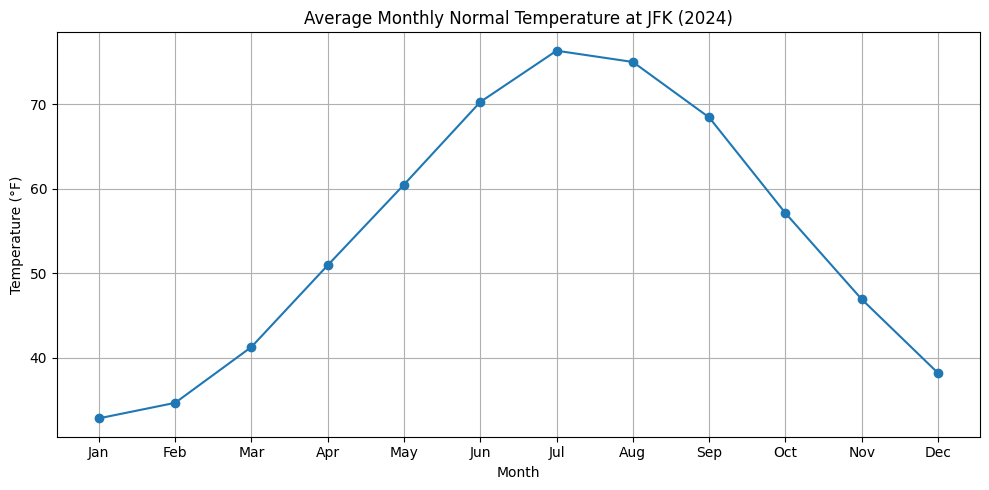

In [48]:
# average temperature across 12 months from csv files
# month files mapping and create month labels
temp_folder = "../data/raw/raw data/JFKWeatherData"

month_files = {
    "jfkjan.csv": "Jan", "jfkfeb.csv": "Feb", "jfkmar.csv": "Mar", "jfkapr.csv": "Apr",
    "jfkmay.csv": "May", "jfkjun.csv": "Jun", "jfkjul.csv": "Jul", "jfkaug.csv": "Aug",
    "jfksep.csv": "Sep", "jfkoct.csv": "Oct", "jfknov.csv": "Nov", "jfkdec.csv": "Dec"
}

monthly_avg_temps = []
month_labels = []

for filename, month in month_files.items():
    file_path = os.path.join(temp_folder, filename)
    
    try:
        # read the file without header, skip first 5 rows of actual metadata
        df = pd.read_csv(file_path, header=None, skiprows=5)
        
        # column index 3 = "Normal Mean T."  Calculate average temp of all days in month
        mean_temps = pd.to_numeric(df.iloc[:, 3], errors="coerce")
        monthly_avg = mean_temps.mean()
        
        monthly_avg_temps.append(monthly_avg)
        month_labels.append(month)

        # print the average temeprature for this month
        print(f"{month}: {monthly_avg:.2f}°F")
        
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        monthly_avg_temps.append(None)
        month_labels.append(month)

# plot the graph
plt.figure(figsize=(10, 5))
plt.plot(month_labels, monthly_avg_temps, marker='o')
plt.title("Average Monthly Normal Temperature at JFK (2024)")
plt.xlabel("Month")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.tight_layout()
plt.show()

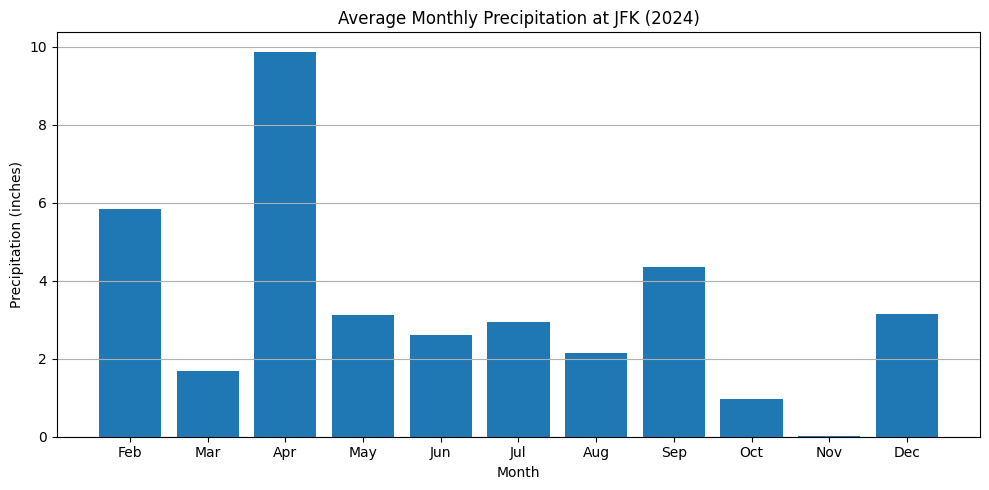

In [ ]:
# load the file for precipitation
precip_path = "../data/raw/raw data/JFKWeatherData/2024_weather_data.csv"

# read the file without header
df = pd.read_csv(precip_path, header=None)

# get the row with average monthly precipitation (row index 4 = 5th row)
mean_precip = df.iloc[4, 1:13]  # Columns B to M (Jan to Dec)

# create the month labels
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# convert values to numeric 
mean_precip = pd.to_numeric(mean_precip, errors="coerce")


# print out each month's average precipitation
print("Average Monthly Precipitation at JFK:")
for month, value in zip(months, mean_precip):
    print(f"{month}: {value:.2f} in")

# plot the graph
plt.figure(figsize=(10, 5))
plt.bar(months, mean_precip)
plt.title("Average Monthly Precipitation at JFK (2024)")
plt.xlabel("Month")
plt.ylabel("Precipitation (inches)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()